from google.colab import drive
drive.mount('/content/drive')

In [131]:
!pip install holisticai[all]

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Settings
np.random.seed(0)
import warnings
warnings.filterwarnings("ignore")

In [133]:
columns_list = ['income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co-applicant_credit_score_type', 'loan_amount', 'loan_purpose', 'loan_to_value_ratio', 'loan_term', 'preapproval', 'lien_status', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'property_value', 'construction_method', 'occupancy_type', 'county_code', 'census_tract', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex','applicant_age', 'action_taken']

#columns_list = ['loan_purpose', 'loan_amount', 'action_taken', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex', 'lien_status',


#  'income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co-applicant_credit_score_type', 'loan_amount', 'loan_type', 'loan_purpose', 'loan_to_value_ratio', 'interest_rate', 'rate_spread', 'loan_term', 'preapproval', 'lien_status', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'property_value', 'construction_method', 'occupancy_type', 'county_code', 'census_tract', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex', 'action_taken']


int_types = ['applicant_ethnicity-1',
       'applicant_ethnicity-2', 'applicant_ethnicity-3',
       'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1',
       'applicant_race-2', 'applicant_race-3', 'applicant_race-4',
       'applicant_race-5', 'applicant_sex', 'action_taken']
float_types=['loan_amount','loan_to_value_ratio', 'interest_rate', 'rate_spread', 'income', 'debt_to_income_ratio', 'loan_to_value_ratio']

object_types=[]

data = pd.read_csv("state_CA.csv", usecols= columns_list)



In [134]:
len(columns_list)

33

In [135]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'loan_term', 'prepayment_penalty_term', 'intro_rate_period',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'occupancy_type', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity-1',
       'applicant_ethnicity-2', 'applicant_ethnicity-3',
       'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1',
       'applicant_race-2', 'applicant_race-3', 'applicant_race-4',
       'applicant_race-5', 'applicant_sex', 'applicant_age'],
      dtype='object')

In [136]:
columns_to_check_for_na = ['county_code', 'census_tract', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio', 'loan_term', 'prepayment_penalty_term',
       'intro_rate_period', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'property_value', 'construction_method',
       'occupancy_type', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'co-applicant_credit_score_type',
       'applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']

data= data.dropna(subset=columns_to_check_for_na)


In [137]:
data = data[data!= 'Exempt']
data = data[data!= '1111']
data = data[data!= 1111]
data = data[data!= '8888']
data = data[data!= 8888]

In [138]:
data = data[data!= 'NaN']
data = data[data!= 'nan']

In [139]:
# Update action_taken values
data['action_taken'] = data['action_taken'].replace({1: 1, 2: 1, 3: 0, 7: 0})

# Drop rows with action_taken values of 4, 5, 6, or 8
data = data[~data['action_taken'].isin([4, 5, 6, 8])]
data = data[~data['applicant_ethnicity-1'].isin([3, 4])]
data = data[~data['applicant_sex'].isin([3, 4, 6])]



In [140]:
action_taken_counts = data['action_taken'].value_counts()
print(action_taken_counts)

action_taken
0    32992
1    31881
Name: count, dtype: int64


In [141]:
data['debt_to_income_ratio']= data['debt_to_income_ratio'].replace({
    '<20%': '0',
    '>60%': '60',

    '30%-<36%': '30',
    '20%-<30%': '20',
    '50%-60%': '50'
})

num_elements_per_range = min(data['debt_to_income_ratio'].value_counts())



In [142]:

replacement_ranges = {
    '37': [37,38,39,40,41,42],
    '43': [43,44,45,46,47,48,49],
}

for key,value in replacement_ranges.items():
  selected_rows= data['debt_to_income_ratio'].astype(float).between(min(value), max(value))
  data.loc[selected_rows, 'debt_to_income_ratio'] = key



In [143]:
print(data['debt_to_income_ratio'].head(50))

54108     NaN
54116     NaN
54131     NaN
54139     NaN
64997      50
65587      50
65619      43
65778      30
65834      37
65915      30
65968      43
66011      30
66133      30
66171      60
66239      20
66308      20
126778     20
126783      0
126789     43
126790     36
126792     43
126793     37
126796     43
126797     43
126798     37
126802     20
126806     37
126807     20
126810     60
126813     37
126816     43
126820     30
126821     43
126826     36
126831     20
126835     43
126837     43
126839     20
126842      0
126845     30
126847     37
126850     37
126852      0
126856     30
126857     60
126859     30
126860     60
126862     37
126865     20
126870     30
Name: debt_to_income_ratio, dtype: object


In [144]:
for i in range(1, 6):
        race_col = f'applicant_race-{i}'
        data[race_col] = data[race_col].replace({1: 1, 2: 2, 21:2, 22:2, 23:2, 24:2, 25:2, 26:2, 27:2, 3: 3, 4: 4, 41:4, 42: 4, 43: 4, 44: 4})

for i in range(1, 6):
        race_col = f'applicant_ethnicity-{i}'
        data[race_col] = data[race_col].replace({1: 1, 2: 0, 11:1, 12:1, 13:1, 14:1})

data['applicant_ethnicity'] = (data[['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5']].sum(axis=1) >= 1).astype(int) + 1
data.drop(['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5'],  axis=1, inplace=True)


In [145]:
data

,county_code,census_tract,action_taken,preapproval,loan_purpose,lien_status,loan_amount,loan_to_value_ratio,loan_term,prepayment_penalty_term,...,applicant_credit_score_type,co-applicant_credit_score_type,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,applicant_sex,applicant_age,applicant_ethnicity
54108,6085.0,6.085504e+09,1,2,1,1,1085000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,35-44,1
54116,6059.0,6.059063e+09,1,2,1,1,1955000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,35-44,1
54131,6037.0,6.037262e+09,1,2,1,1,3045000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,NaN,1
54139,6059.0,6.059063e+09,1,2,1,1,2625000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,NaN,1
64997,6085.0,6.085508e+09,1,2,1,1,1725000.0,65.0,360.0,18.0,...,9.0,10.0,2.0,NaN,NaN,NaN,NaN,1,45-54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547658,6071.0,6.071002e+09,1,2,1,1,395000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,25-34,1
1547660,6059.0,6.059052e+09,1,2,1,1,1025000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2,25-34,1
1547661,6037.0,6.037403e+09,1,2,1,1,545000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,25-34,1
1547662,6037.0,6.037431e+09,1,2,32,1,875000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2,45-54,1


In [146]:
def combine_race(row):
    races = []
    for i in range(1, 6):
        race_col = f'applicant_race-{i}'
        if pd.notna(row[race_col]) and row[race_col] in [1,2,3,4,5]:
            races.append(row[race_col])
    return races


In [147]:
from sklearn.preprocessing import MultiLabelBinarizer

app_race = data.apply(combine_race, axis=1)
mlb = MultiLabelBinarizer()
race_binarized = mlb.fit_transform(app_race)
data=data.drop(columns=['applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5'])

In [148]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'loan_term', 'prepayment_penalty_term', 'intro_rate_period',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'occupancy_type', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_sex', 'applicant_age',
       'applicant_ethnicity'],
      dtype='object')

In [149]:
race_binarized

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [150]:
import numpy as np
race_sums = race_binarized.sum(axis=1)
data['Mixed'] = (race_sums > 1).astype(int)

data = data[race_sums > 0]
race_binarized = race_binarized[race_sums > 0]

In [151]:
for i, race in enumerate(['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White']):
    data[f'{race}'] = race_binarized[:, i]

In [152]:
race_columns = ['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White']
result_a =data[race_columns].sum(axis=1)<1
off_rows = data[result_a]
print(off_rows)

Empty DataFrame
Columns: [county_code, census_tract, action_taken, preapproval, loan_purpose, lien_status, loan_amount, loan_to_value_ratio, loan_term, prepayment_penalty_term, intro_rate_period, negative_amortization, interest_only_payment, balloon_payment, property_value, construction_method, occupancy_type, income, debt_to_income_ratio, applicant_credit_score_type, co-applicant_credit_score_type, applicant_sex, applicant_age, applicant_ethnicity, Mixed, AI or AN, Asian, Black or AA, NH or PI, White]
Index: []

[0 rows x 30 columns]


In [153]:
data.dropna(inplace=True)

In [154]:
data['prepayment_penalty_term'] = data['prepayment_penalty_term'].astype(int)
data['intro_rate_period'] = data['intro_rate_period'].astype(int)

In [155]:
x = 0
for column in data.columns:
  distinct_values = data[column].nunique()
  print(f"Column '{column}' has {distinct_values} distinct values", x)
  x+=1

Column 'county_code' has 57 distinct values 0
Column 'census_tract' has 8063 distinct values 1
Column 'action_taken' has 2 distinct values 2
Column 'preapproval' has 2 distinct values 3
Column 'loan_purpose' has 6 distinct values 4
Column 'lien_status' has 2 distinct values 5
Column 'loan_amount' has 186 distinct values 6
Column 'loan_to_value_ratio' has 26126 distinct values 7
Column 'loan_term' has 13 distinct values 8
Column 'prepayment_penalty_term' has 7 distinct values 9
Column 'intro_rate_period' has 9 distinct values 10
Column 'negative_amortization' has 2 distinct values 11
Column 'interest_only_payment' has 2 distinct values 12
Column 'balloon_payment' has 2 distinct values 13
Column 'property_value' has 1058 distinct values 14
Column 'construction_method' has 2 distinct values 15
Column 'occupancy_type' has 3 distinct values 16
Column 'income' has 1343 distinct values 17
Column 'debt_to_income_ratio' has 8 distinct values 18
Column 'applicant_credit_score_type' has 8 distinc

In [156]:
import numpy as np
categorical_features = []
dicts = {}
x = 0
for column in data.columns:
  feature_dict= {}
  distinct_values = data[column].nunique()
  if column == 'action_taken' or column == 'Asian' or column == 'Black or AA' or column == 'NH or PI' or column == 'White':
    continue
  if column == 'AI or AN':
    feature_dict['AI or AN'] = x
    x+=1
    feature_dict['Asian'] = x
    x+=1
    feature_dict['Black or AA'] = x
    x+=1
    feature_dict['NH or PI'] = x
    x+=1
    feature_dict['White'] = x
    x+=1
    dicts['race'] = feature_dict
    continue
  elif distinct_values < 50 and distinct_values>2:
    categorical_features.append(column)
    distinct_ops = data[column].unique()
    for y in distinct_ops:
      feature_dict[y] = x
      print(f"Column '{column}' has {y} distinct values", x)
      x+=1
  elif distinct_values == 2:
    feature_dict['binary'] = x
    print(f"Column '{column}' has BINARY distinct values", x)
    x+=1
  else:
    feature_dict['continuous'] = x
    print(f"Column '{column}' has CONTINUOUS distinct values", x)
    x+=1
  dicts[column]=feature_dict

Column 'county_code' has CONTINUOUS distinct values 0
Column 'census_tract' has CONTINUOUS distinct values 1
Column 'preapproval' has BINARY distinct values 2
Column 'loan_purpose' has 1 distinct values 3
Column 'loan_purpose' has 31 distinct values 4
Column 'loan_purpose' has 2 distinct values 5
Column 'loan_purpose' has 32 distinct values 6
Column 'loan_purpose' has 4 distinct values 7
Column 'loan_purpose' has 5 distinct values 8
Column 'lien_status' has BINARY distinct values 9
Column 'loan_amount' has CONTINUOUS distinct values 10
Column 'loan_to_value_ratio' has CONTINUOUS distinct values 11
Column 'loan_term' has 360.0 distinct values 12
Column 'loan_term' has 240.0 distinct values 13
Column 'loan_term' has 360 distinct values 14
Column 'loan_term' has 240 distinct values 15
Column 'loan_term' has 300 distinct values 16
Column 'loan_term' has 180 distinct values 17
Column 'loan_term' has 180.0 distinct values 18
Column 'loan_term' has 300.0 distinct values 19
Column 'loan_term' 

In [157]:
print(dicts)

{'county_code': {'continuous': 0}, 'census_tract': {'continuous': 1}, 'preapproval': {'binary': 2}, 'loan_purpose': {1: 3, 31: 4, 2: 5, 32: 6, 4: 7, 5: 8}, 'lien_status': {'binary': 9}, 'loan_amount': {'continuous': 10}, 'loan_to_value_ratio': {'continuous': 11}, 'loan_term': {360.0: 12, 240.0: 13, '360': 14, '240': 15, '300': 16, '180': 17, 180.0: 18, 300.0: 19, '60': 20, '120': 21, '480': 22, '84': 23, '420': 24}, 'prepayment_penalty_term': {18: 25, 36: 26, 0: 27, 24: 28, 12: 29, 6: 30, 2: 31}, 'intro_rate_period': {60: 32, 1: 33, 84: 34, 299: 35, 120: 36, 3: 37, 12: 38, 6: 39, 9: 40}, 'negative_amortization': {'binary': 41}, 'interest_only_payment': {'binary': 42}, 'balloon_payment': {'binary': 43}, 'property_value': {'continuous': 44}, 'construction_method': {'binary': 45}, 'occupancy_type': {3: 46, 1: 47, 2: 48}, 'income': {'continuous': 49}, 'debt_to_income_ratio': {'50': 50, '30': 51, '37': 52, '43': 53, '60': 54, '20': 55, '0': 56, '36': 57}, 'applicant_credit_score_type': {9.0

In [158]:
import pickle
file_path = '/content/drive/MyDrive/headers_dict.pickle'

with open(file_path, 'wb') as file:  # The 'wb' argument denotes write-binary mode
    pickle.dump(dicts, file)

print(f"Dictionary saved to {file_path}")

Dictionary saved to /content/drive/MyDrive/headers_dict.pickle


In [159]:
# = ['occupancy_type', 'preapproval','lien_status', 'balloon_payment', 'negative_amortization', 'interest_only_payment', 'debt_to_income_ratio','applicant_age', 'loan_purpose', 'applicant_credit_score_type', 'co-applicant_credit_score_type']

data_encoded = pd.get_dummies(data, columns=categorical_features)

In [160]:
data = data_encoded

In [161]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'income', 'applicant_sex',
       'applicant_ethnicity', 'Mixed', 'AI or AN', 'Asian', 'Black or AA',
       'NH or PI', 'White', 'loan_purpose_1', 'loan_purpose_2',
       'loan_purpose_4', 'loan_purpose_5', 'loan_purpose_31',
       'loan_purpose_32', 'loan_term_180.0', 'loan_term_240.0',
       'loan_term_300.0', 'loan_term_360.0', 'loan_term_120', 'loan_term_180',
       'loan_term_240', 'loan_term_300', 'loan_term_360', 'loan_term_420',
       'loan_term_480', 'loan_term_60', 'loan_term_84',
       'prepayment_penalty_term_0', 'prepayment_penalty_term_2',
       'prepayment_penalty_term_6', 'prepayment_penalty_term_12',
       'prepayment_penalty_term_18', 'prepayment_penalty_term_24',
       'prepayment_penalty_term_36', 'intro_rat

In [162]:

# Separate the majority and minority classes
df_majority = data[data.action_taken == 0]
df_minority = data[data.action_taken == 1]

# Undersample the majority class without replacement
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

# Shuffle the dataset to prevent the model from learning any order
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)


In [163]:
 data = df_undersampled

In [164]:
action_taken_counts = data['action_taken'].value_counts()
print(action_taken_counts)

action_taken
1    26720
0    26720
Name: count, dtype: int64


In [165]:
#DATA ANALYSIS FOR EQUALIZED ODDS
from holisticai.datasets import load_dataset
from holisticai.bias.plots import group_pie_plot

df, group_c, group_d = load_dataset(dataset='adult', preprocessed=True, as_array=False)
data['applicant_ethnicity'] = data['applicant_ethnicity'].replace(2, 0)
print(data['applicant_ethnicity'])

0        1
1        1
2        1
3        1
4        0
        ..
53435    1
53436    1
53437    1
53438    1
53439    1
Name: applicant_ethnicity, Length: 53440, dtype: int64


<Axes: >

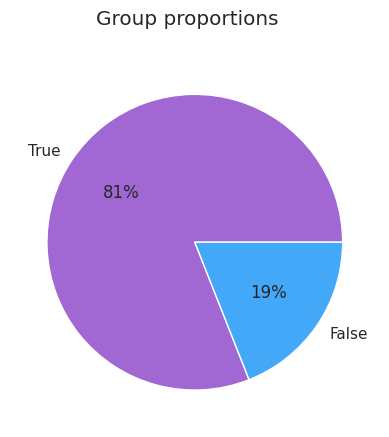

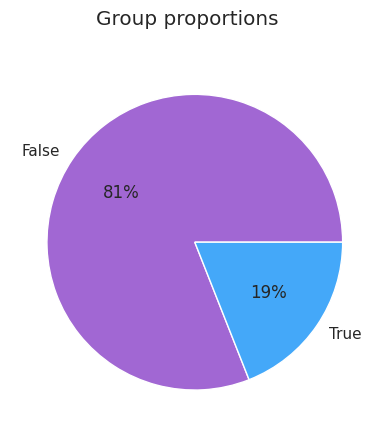

In [166]:
group_a = data['applicant_ethnicity'].astype(bool)
group_b = ~data['applicant_ethnicity'].astype(bool)
group_pie_plot(group_a)
group_pie_plot(group_b)

<Axes: >

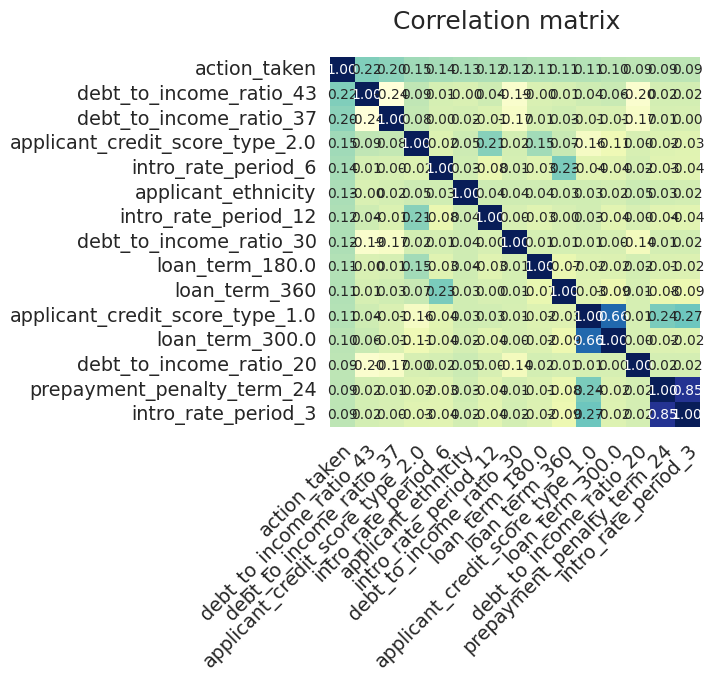

In [167]:
from holisticai.bias.plots import correlation_matrix_plot

correlation_matrix_plot(data, target_feature='action_taken', n_features=15)

In [168]:
from sklearn.model_selection import train_test_split

# Assuming 'action_taken' is the target variable


columns_with_na = data.columns[data.isna().any()].tolist()
X = data.drop(['action_taken','applicant_ethnicity'], axis=1)
y = data['action_taken']

# Split data into training and testing sets
X_train, X_test, y_train, y_test, group_a_tr, group_a_ts, group_b_tr, group_b_ts = train_test_split(X, y, group_a, group_b, test_size=0.2, random_state=42)

train_data = X_train, y_train, group_a_tr, group_b_tr
test_data  = X_test, y_test, group_a_ts, group_b_ts

In [169]:
columns_with_na

[]

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from holisticai.pipeline import Pipeline
from sklearn import metrics


metrics_dict={
        "Accuracy": metrics.accuracy_score,
        "Balanced accuracy": metrics.balanced_accuracy_score,
        "Precision": metrics.precision_score,
        "Recall": metrics.recall_score,
        "F1-Score": metrics.f1_score}


# efficacy metrics dataframe helper tool
def metrics_dataframe(y_pred, y_true, metrics_dict=metrics_dict):
    metric_list = [[pf, fn(y_true, y_pred)] for pf, fn in metrics_dict.items()]
    return pd.DataFrame(metric_list, columns=["Metric", "Value"]).set_index("Metric")


In [171]:
X_train, y_train, group_a_tr, group_b_tr = train_data

# Train a simple linear classification model
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=3000))
logistic_model.fit(X_train, y_train)

X_test, y_test, group_a_ts, group_b_ts = test_data

y_pred = logistic_model.predict(X_test)

y_proba = logistic_model.predict_proba(X)
y_score = y_proba[:,1]
y_true = y


# Calculate the accuracy
logistic_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {logistic_accuracy:.4f}')

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

Logistic Regression Accuracy: 0.7861


In [172]:
print(report)

              precision    recall  f1-score   support

     Class 0       0.83      0.72      0.77      5315
     Class 1       0.75      0.85      0.80      5373

    accuracy                           0.79     10688
   macro avg       0.79      0.79      0.78     10688
weighted avg       0.79      0.79      0.79     10688



In [173]:
metrics_dataframe(y_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.786115
Balanced accuracy,0.785743
Precision,0.753323
Recall,0.854271
F1-Score,0.800628


In [174]:
from holisticai.bias.metrics import classification_bias_metrics

print(group_a.shape, group_b.shape, y_pred.shape)
df = classification_bias_metrics(
    group_a_ts,
    group_b_ts,
    y_pred,
    y_test,
    metric_type='both'
)
y_baseline = y_pred.copy()
df_baseline=df.copy()
df_baseline

(53440,) (53440,) (10688,)


,Value,Reference
Metric,,
Statistical Parity,0.121492,0
Disparate Impact,1.257614,1
Four Fifths Rule,0.795156,1
Cohen D,0.246550,0
2SD Rule,9.942251,0
Equality of Opportunity Difference,0.005188,0
False Positive Rate Difference,0.037607,0
Average Odds Difference,0.021397,0
Accuracy Difference,0.002975,0


In [175]:
from holisticai.bias.mitigation import EqualizedOdds

In [176]:
model = LogisticRegression()
pipeline = Pipeline(
    steps=[
        ('scalar', StandardScaler()),
        ("estimator", LogisticRegression()),
        ("bm_posprocessing", EqualizedOdds(solver='highs', seed=42)),
        ]
    )

X_train, y_train, group_a_tr, group_b_tr = train_data
fit_params = {
    "bm__group_a": group_a_tr,
    "bm__group_b": group_b_tr
}

pipeline.fit(X_train, y_train, **fit_params)

X_test, y_test, group_a_ts, group_b_ts = test_data
predict_params = {
    "bm__group_a": group_a_ts,
    "bm__group_b": group_b_ts,
}
y_pred = pipeline.predict(X_test, **predict_params)
df = classification_bias_metrics(
    group_a_ts,
    group_b_ts,
    y_pred,
    y_test,
    metric_type='both'
)
df_eq_odds_w_p = df.copy()
df_eq_odds_w_p

,Value,Reference
Metric,,
Statistical Parity,0.100258,0
Disparate Impact,1.203428,1
Four Fifths Rule,0.830959,1
Cohen D,0.203397,0
2SD Rule,8.214257,0
Equality of Opportunity Difference,0.006541,0
False Positive Rate Difference,0.003392,0
Average Odds Difference,0.004967,0
Accuracy Difference,0.025197,0


In [177]:
metrics_dataframe(y_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.781905
Balanced accuracy,0.781511
Precision,0.747881
Recall,0.854085
F1-Score,0.797463


In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
rf_pred = rf_model.predict(X_test)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

# Generate and print the classification report
rf_report = classification_report(y_test, rf_pred, target_names=['Class 0', 'Class 1'])
print(rf_report)

Random Forest Accuracy: 0.828499251497006
              precision    recall  f1-score   support

     Class 0       0.85      0.79      0.82      5315
     Class 1       0.81      0.87      0.84      5373

    accuracy                           0.83     10688
   macro avg       0.83      0.83      0.83     10688
weighted avg       0.83      0.83      0.83     10688



In [179]:
metrics_dataframe(rf_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.828499
Balanced accuracy,0.828289
Precision,0.806334
Recall,0.867113
F1-Score,0.835620


In [180]:
df_rf = classification_bias_metrics(
    group_a_ts,
    group_b_ts,
    rf_pred,
    y_test,
    metric_type='both'
)
rf_baseline = rf_pred.copy()
df_rf_baseline=df_rf.copy()
df_rf_baseline

,Value,Reference
Metric,,
Statistical Parity,0.149712,0
Disparate Impact,1.357087,1
Four Fifths Rule,0.736872,1
Cohen D,0.302520,0
2SD Rule,12.170899,0
Equality of Opportunity Difference,0.029492,0
False Positive Rate Difference,0.044879,0
Average Odds Difference,0.037185,0
Accuracy Difference,-0.002004,0


In [181]:
model = rf_model = RandomForestClassifier(random_state=42)
pipeline = Pipeline(
    steps=[
        ("estimator", RandomForestClassifier()),
        ("bm_posprocessing", EqualizedOdds(solver='highs', seed=42)),
        ]
    )

X_train, y_train, group_a_tr, group_b_tr = train_data
fit_params = {
    "bm__group_a": group_a_tr,
    "bm__group_b": group_b_tr
}

pipeline.fit(X_train, y_train, **fit_params)

X_test, y_test, group_a_ts, group_b_ts = test_data
predict_params = {
    "bm__group_a": group_a_ts,
    "bm__group_b": group_b_ts,
}
rf_pred = pipeline.predict(X_test, **predict_params)
df = classification_bias_metrics(
    group_a_ts,
    group_b_ts,
    rf_pred,
    y_test,
    metric_type='both'
)
df_eq_odds_w_p = df.copy()
df_eq_odds_w_p

,Value,Reference
Metric,,
Statistical Parity,0.149199,0
Disparate Impact,1.356704,1
Four Fifths Rule,0.737080,1
Cohen D,0.301400,0
2SD Rule,12.126462,0
Equality of Opportunity Difference,0.025706,0
False Positive Rate Difference,0.046003,0
Average Odds Difference,0.035855,0
Accuracy Difference,-0.004621,0


In [182]:
metrics_dataframe(rf_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.829341
Balanced accuracy,0.829138
Precision,0.807913
Recall,0.866555
F1-Score,0.836207


In [117]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with preprocessing and the MLP model
# StandardScaler is used to scale the data for better performance of the MLP
mlp_model = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000,random_state=42, solver='sgd'))


# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test data
mlp_pred = mlp_model.predict(X_test)

# Calculate the accuracy
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f'MLP Accuracy: {mlp_accuracy}')

# Generate and print the classification report
mlp_report = classification_report(y_test, mlp_pred, target_names=['Class 0', 'Class 1'])
print(mlp_report)


MLP Accuracy: 0.8150261976047904
              precision    recall  f1-score   support

     Class 0       0.84      0.78      0.81      5315
     Class 1       0.80      0.85      0.82      5373

    accuracy                           0.82     10688
   macro avg       0.82      0.81      0.81     10688
weighted avg       0.82      0.82      0.81     10688



In [118]:
metrics_dataframe(mlp_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.815026
Balanced accuracy,0.814834
Precision,0.795819
Recall,0.850177
F1-Score,0.822100


In [119]:
df_mlp = classification_bias_metrics(
    group_a_ts,
    group_b_ts,
    mlp_pred,
    y_test,
    metric_type='both'
)
mlp_baseline = mlp_pred.copy()
df_mlp_baseline=df_mlp.copy()
df_mlp_baseline

,Value,Reference
Metric,,
Statistical Parity,0.140452,0
Disparate Impact,1.331872,1
Four Fifths Rule,0.750823,1
Cohen D,0.283410,0
2SD Rule,11.411718,0
Equality of Opportunity Difference,0.039665,0
False Positive Rate Difference,0.030336,0
Average Odds Difference,0.035001,0
Accuracy Difference,0.009400,0


In [120]:
metrics_dataframe(mlp_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.815026
Balanced accuracy,0.814834
Precision,0.795819
Recall,0.850177
F1-Score,0.822100


In [121]:
model = mlp_model = MLPClassifier(max_iter=1000,random_state=42, solver='sgd')
pipeline = Pipeline(
    steps=[
        ('scalar', StandardScaler()),
        ("estimator", MLPClassifier()),
        ("bm_posprocessing", EqualizedOdds(solver='highs', seed=42)),
        ]
    )

X_train, y_train, group_a_tr, group_b_tr = train_data
fit_params = {
    "bm__group_a": group_a_tr,
    "bm__group_b": group_b_tr
}

pipeline.fit(X_train, y_train, **fit_params)

X_test, y_test, group_a_ts, group_b_ts = test_data
predict_params = {
    "bm__group_a": group_a_ts,
    "bm__group_b": group_b_ts,
}
mlp_pred = pipeline.predict(X_test, **predict_params)
df = classification_bias_metrics(
    group_a_ts,
    group_b_ts,
    mlp_pred,
    y_test,
    metric_type='both'
)
df_eq_odds_w_p = df.copy()
df_eq_odds_w_p

,Value,Reference
Metric,,
Statistical Parity,0.103466,0
Disparate Impact,1.228733,1
Four Fifths Rule,0.813846,1
Cohen D,0.208167,0
2SD Rule,8.405616,0
Equality of Opportunity Difference,-0.020784,0
False Positive Rate Difference,0.013743,0
Average Odds Difference,-0.003521,0
Accuracy Difference,-0.004484,0


In [122]:
metrics_dataframe(mlp_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.804266
Balanced accuracy,0.804079
Precision,0.786250
Recall,0.838638
F1-Score,0.811599


In [123]:
coefficients = logistic_model.named_steps['logisticregression'].coef_[0]
feature_names = X_train.columns
feature_coefficients = dict(zip(feature_names, coefficients))
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, coefficient in sorted_features:
    print(feature, coefficient)


debt_to_income_ratio_60 -1.743831594456137
loan_term_180.0 0.885904537231487
debt_to_income_ratio_43 0.6181416614626783
debt_to_income_ratio_37 0.6141209758028587
loan_to_value_ratio -0.5373500669107365
loan_term_300 -0.42076252447604795
debt_to_income_ratio_30 0.41337703263497755
debt_to_income_ratio_20 0.3215034879244898
debt_to_income_ratio_50 -0.27980547587019416
prepayment_penalty_term_12 0.2786779824902454
applicant_credit_score_type_9.0 -0.274133330476062
loan_amount 0.2718977988659897
applicant_credit_score_type_1.0 0.25709742420230236
loan_term_180 0.2523353569984884
prepayment_penalty_term_2 -0.24673497865145905
intro_rate_period_1 -0.23412607019575102
prepayment_penalty_term_24 0.21835785051742213
lien_status 0.21725418383322864
debt_to_income_ratio_36 0.21432168130062418
White 0.19578441338146402
intro_rate_period_3 0.18979526395437815
applicant_credit_score_type_2.0 0.18577882476914254
loan_term_360.0 -0.18379604986320291
intro_rate_period_6 0.17878894500578082
census_trac

Logistic


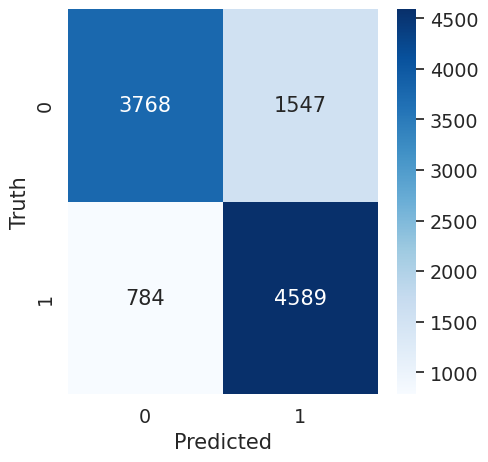


Random Forest


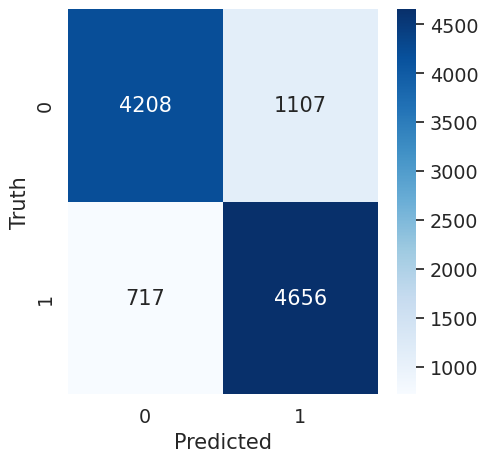


MLP


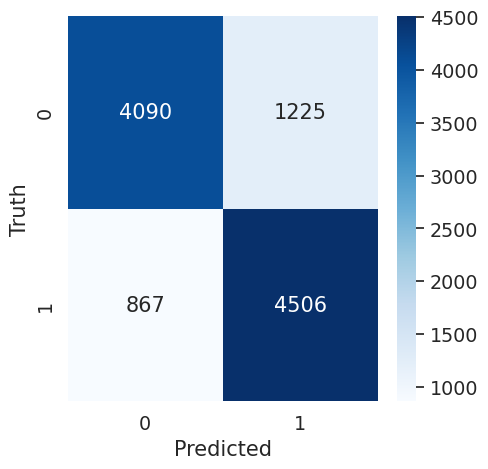

In [124]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print("Logistic")
lg_cm = confusion_matrix(y_test, y_pred)

rf_cm =confusion_matrix(y_test, rf_pred)

mlp_cm = confusion_matrix(y_test, mlp_pred)

plt.figure(figsize=(5,5))
sns.heatmap(lg_cm, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

print("\nRandom Forest")
plt.figure(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

print("\nMLP")
plt.figure(figsize=(5,5))
sns.heatmap(mlp_cm, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()